In [2]:
import pandas as pd
import numpy as np

In [4]:
# Loading dataframes from csv files
weather = pd.read_csv('weather_summary.csv', index_col = False)
flights = pd.read_csv('data_thieves_skyscanner_final.csv', index_col = False)
hotels = pd.read_csv('data_thieves_hotel_final.csv', index_col = False)

In [5]:
# Renaming Id column to be able to merge our data
hotels = hotels.rename(columns={'id': 'Id'})
weather = weather.rename(columns={'id': 'Id'})
flights = flights.rename(columns={'id': 'Id'})
hotels['Id'] = hotels['Id'].str.capitalize()
weather['Id'] = weather['Id'].str.capitalize()
flights['Id'] = flights['Id'].str.capitalize()

In [6]:
# Merging our dataframes on the Id column
combine = flights.merge(weather,on='Id' ).merge(hotels, on='Id')

In [7]:
# Cleaning a bit 
combine = combine.drop(['Unnamed: 0', 'Outbound_duration', 'Inbound_duration'], axis=1)

combine['Destination'] = combine['City']
combine = combine.drop('City', axis=1)

colnames = [i.replace('_',' ').capitalize().strip() for i in combine.columns]
combine = combine.set_axis(colnames, axis=1, inplace=False)

In [8]:
pd.set_option('display.max_columns', 50)

combine

,Id,Flight price,Destination,Outbound departure date,Outbound departure time,Outbound stops,Inbound departure date,Inbound departure time,Inbound stops,Link,Ticket provider,Lower temperature,Higher temperature,Rain probability,Hotel name,Hotel price per night,User rating,Stars,Cheapest provider name,Address,Phone,Distance from city centre
0,Cancun_2019-12-21,1581.71,Cancún,2019-12-21,07:45:00,2,2019-12-27,06:45:00,2,http://partners.api.skyscanner.net/apiservices...,Expedia,20.662381,28.203333,8.142857,Krystal Urban Cancun,80.0,80,4.0,Cancelon,"Avenida Sayil SM4A, Lote 7",+52 998 848 8000,1.137819
1,Cancun_2020-01-18,563.41,Cancún,2020-01-18,06:00:00,2,2020-01-24,14:47:00,2,http://partners.api.skyscanner.net/apiservices...,KLM,20.982381,27.445238,13.714286,Hotel Kavia,30.0,81,4.0,SnapTravel,Claveles 109,+52 998 217 7742,0.502080
2,Cancun_2020-02-22,750.60,Cancún,2020-02-22,10:15:00,2,2020-02-28,16:30:00,2,http://partners.api.skyscanner.net/apiservices...,United,22.402381,29.317619,6.476190,Krystal Urban Cancun,56.0,80,4.0,Cancelon,"Avenida Sayil SM4A, Lote 7",+52 998 848 8000,1.137819
3,Rio de janeiro_2019-12-21,1972.32,Rio de Janeiro,2019-12-21,06:00:00,2,2019-12-27,16:30:00,1,http://partners.api.skyscanner.net/apiservices...,Air France,24.212381,32.283333,13.285714,Hotel Atlântico Travel,33.0,81,4.0,SnapTravel,Rua Barata Ribeiro Nº 544,+55 213 479 2000,7.798410
4,Rio de janeiro_2020-01-18,1059.80,Rio de Janeiro,2020-01-18,17:45:00,2,2020-01-24,18:55:00,2,http://partners.api.skyscanner.net/apiservices...,LATAM Airlines,25.240952,33.672857,7.190476,Arosa Rio Hotel,33.0,85,4.0,SnapTravel,Rua Henrique Valadares 150,+55 213 231 8031,2.027751
5,Rio de janeiro_2020-02-22,694.18,Rio de Janeiro,2020-02-22,20:30:00,1,2020-02-28,16:30:00,1,http://partners.api.skyscanner.net/apiservices...,KLM,24.166190,31.829524,14.428571,Novotel Rj Porto Atlantico,99.0,89,4.0,Novotel,"Avenida Professor Pereira Reis, 49",+55 213 077 2500,0.791495
6,Buenos aires_2019-12-21,1690.95,Buenos Aires,2019-12-21,15:10:00,1,2019-12-27,14:20:00,1,http://partners.api.skyscanner.net/apiservices...,Air France,20.469048,28.863333,8.428571,Unique Palacio San Telmo,36.0,77,4.0,Priceline,Moreno 606,+54 114 807 7008,0.282323
7,Buenos aires_2020-01-18,1201.76,Buenos Aires,2020-01-18,10:05:00,1,2020-01-24,14:20:00,1,http://partners.api.skyscanner.net/apiservices...,Air France,21.233333,29.923810,8.428571,Cuatro Reyes,22.0,69,4.0,SnapTravel,Av Independencia 1391,+54 114 384 8000,0.900278
8,Buenos aires_2020-02-22,1201.24,Buenos Aires,2020-02-22,15:10:00,1,2020-02-28,16:30:00,1,http://partners.api.skyscanner.net/apiservices...,Air France,19.859048,28.337143,9.904762,Wilton Hotel Buenos Aires,61.0,79,4.0,Wilton Hotel Buenos Aires,Avenida Callao 1162,+54 114 811 1818,2.473522


In [27]:
executive_summary= combine.copy()

In [49]:
Financial_Summary = executive_summary[["Destination", "Ticket provider","Flight price","Hotel name", "Hotel price per night", "Outbound departure date", "Id"]]

In [50]:
Financial_Summary["Total price"] = Financial_Summary["Flight price"]*2 + Financial_Summary["Hotel price per night"]*6

C:\Users\Kaspar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
Financial_Summary

,Destination,Ticket provider,Flight price,Hotel name,Hotel price per night,Outbound departure date,Id,Total price
0,Cancún,Expedia,1581.71,Krystal Urban Cancun,80.0,2019-12-21,Cancun_2019-12-21,3643.42
1,Cancún,KLM,563.41,Hotel Kavia,30.0,2020-01-18,Cancun_2020-01-18,1306.82
2,Cancún,United,750.60,Krystal Urban Cancun,56.0,2020-02-22,Cancun_2020-02-22,1837.20
3,Rio de Janeiro,Air France,1972.32,Hotel Atlântico Travel,33.0,2019-12-21,Rio de janeiro_2019-12-21,4142.64
4,Rio de Janeiro,LATAM Airlines,1059.80,Arosa Rio Hotel,33.0,2020-01-18,Rio de janeiro_2020-01-18,2317.60
5,Rio de Janeiro,KLM,694.18,Novotel Rj Porto Atlantico,99.0,2020-02-22,Rio de janeiro_2020-02-22,1982.36
6,Buenos Aires,Air France,1690.95,Unique Palacio San Telmo,36.0,2019-12-21,Buenos aires_2019-12-21,3597.90
7,Buenos Aires,Air France,1201.76,Cuatro Reyes,22.0,2020-01-18,Buenos aires_2020-01-18,2535.52
8,Buenos Aires,Air France,1201.24,Wilton Hotel Buenos Aires,61.0,2020-02-22,Buenos aires_2020-02-22,2768.48


In [52]:
Financial_Summary= Financial_Summary.sort_values(by= ["Destination", "Outbound departure date"])

In [58]:
Financial_Summary["Destination"] = Financial_Summary["Destination"].replace("Buenos Aires", "BA")
Financial_Summary["Destination"] = Financial_Summary["Destination"].replace("Rio de Janeiro", "Rio")

# Final report display
Financial_Summary

,Destination,Ticket provider,Flight price,Hotel name,Hotel price per night,Outbound departure date,Id,Total price
6,BA,Air France,1690.95,Unique Palacio San Telmo,36.0,2019-12-21,Buenos aires_2019-12-21,3597.90
7,BA,Air France,1201.76,Cuatro Reyes,22.0,2020-01-18,Buenos aires_2020-01-18,2535.52
8,BA,Air France,1201.24,Wilton Hotel Buenos Aires,61.0,2020-02-22,Buenos aires_2020-02-22,2768.48
0,Cancún,Expedia,1581.71,Krystal Urban Cancun,80.0,2019-12-21,Cancun_2019-12-21,3643.42
1,Cancún,KLM,563.41,Hotel Kavia,30.0,2020-01-18,Cancun_2020-01-18,1306.82
2,Cancún,United,750.60,Krystal Urban Cancun,56.0,2020-02-22,Cancun_2020-02-22,1837.20
3,Rio,Air France,1972.32,Hotel Atlântico Travel,33.0,2019-12-21,Rio de janeiro_2019-12-21,4142.64
4,Rio,LATAM Airlines,1059.80,Arosa Rio Hotel,33.0,2020-01-18,Rio de janeiro_2020-01-18,2317.60
5,Rio,KLM,694.18,Novotel Rj Porto Atlantico,99.0,2020-02-22,Rio de janeiro_2020-02-22,1982.36


In [68]:
Financial_Graph=  Financial_Summary[["Destination_Month", "Total price"]]

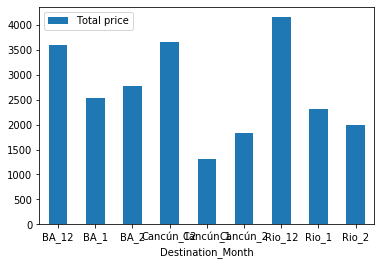

In [70]:
Graph = Financial_Graph.plot.bar(x='Destination_Month', y='Total price', rot=0)

In [71]:
weather_condition = pd.read_csv('weather_condition.csv', index_col = False)

In [74]:
pd.set_option("max_rows", 100)

# to check the weather condition per given period in the city
weather_condition.sort_values(by=["id","city"],ascending=[True, False])

,Unnamed: 0,id,weather condition,city
0,0,Buenos Aires_2019-12-21,Clear throughout the day.,8
6,6,Buenos Aires_2019-12-21,Partly cloudy throughout the day.,4
1,1,Buenos Aires_2019-12-21,Humid and mostly cloudy throughout the day.,2
4,4,Buenos Aires_2019-12-21,Mostly cloudy throughout the day.,2
5,5,Buenos Aires_2019-12-21,Overcast throughout the day.,2
2,2,Buenos Aires_2019-12-21,Humid and partly cloudy throughout the day.,1
3,3,Buenos Aires_2019-12-21,Humid throughout the day.,1
7,7,Buenos Aires_2019-12-21,Possible drizzle overnight.,1
8,8,Buenos Aires_2020-01-18,Clear throughout the day.,9
13,13,Buenos Aires_2020-01-18,Partly cloudy throughout the day.,5
